#Topic:Student Stress Prediction


#Name of Student

---


## Samruddhi Bhujbal-202201070011

## Prathmesh Lashkare-202201070013

##Ritesh Pawar-202201070015

##Vaibhav Dingalwar-202201070017

##Amruta Shende-202201070018

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

In [99]:
df=pd.read_csv("/content/sample_data/StressLevelDataset.csv")

## 1. How big is the data?

In [100]:
df.shape

(1100, 21)

## 2. How does the data look like?

In [101]:
df.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


# 3. What is the data type of cols?


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

# 4. Are there any missing values?

In [103]:
df.isnull().sum()

,0
anxiety_level,0
self_esteem,0
mental_health_history,0
depression,0
headache,0
blood_pressure,0
sleep_quality,0
breathing_problem,0
noise_level,0
living_conditions,0


# 5. How does the data look mathematically?

In [104]:
df.describe()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,11.063636,17.777273,0.492727,12.555455,2.508182,2.181818,2.660000,2.753636,2.649091,2.518182,...,2.772727,2.772727,2.621818,2.648182,2.649091,1.881818,2.734545,2.767273,2.617273,0.996364
std,6.117558,8.944599,0.500175,7.727008,1.409356,0.833575,1.548383,1.400713,1.328127,1.119208,...,1.433761,1.414594,1.315781,1.384579,1.529375,1.047826,1.425265,1.417562,1.530958,0.821673
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,11.000000,0.000000,6.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000
50%,11.000000,19.000000,0.000000,12.000000,3.000000,2.000000,2.500000,3.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.500000,3.000000,1.000000
75%,16.000000,26.000000,1.000000,19.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,...,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,2.000000
max,21.000000,30.000000,1.000000,27.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,2.000000


# 6. Are there duplicate values?

In [105]:
df.duplicated().sum()

0

# 7. How is the correlation between cols?

In [106]:
df.corr()['stress_level']

,stress_level
anxiety_level,0.736795
self_esteem,-0.756195
mental_health_history,0.648644
depression,0.734379
headache,0.713484
blood_pressure,0.394200
sleep_quality,-0.749068
breathing_problem,0.573984
noise_level,0.663371
living_conditions,-0.581723


In [107]:
df.isnull().values.any()


False

In [108]:
df.shape

(1100, 21)

## a. Countplot

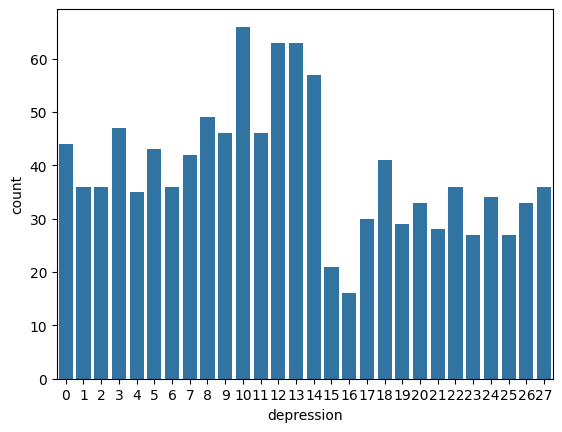

In [109]:
sns.countplot(x='depression',data=df)
plt.show()

<Axes: xlabel='anxiety_level', ylabel='count'>

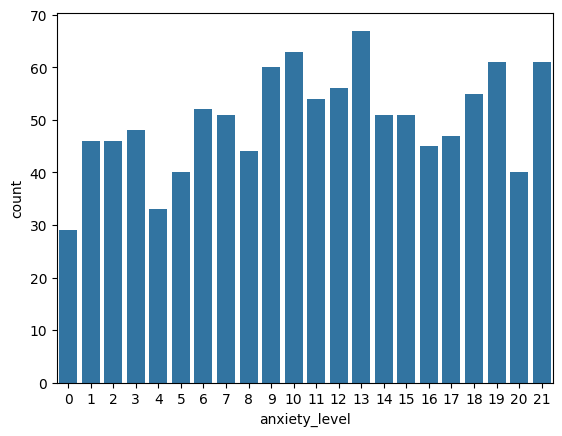

In [110]:
#feature anxiety_level
sns.countplot(x='anxiety_level',data=df)

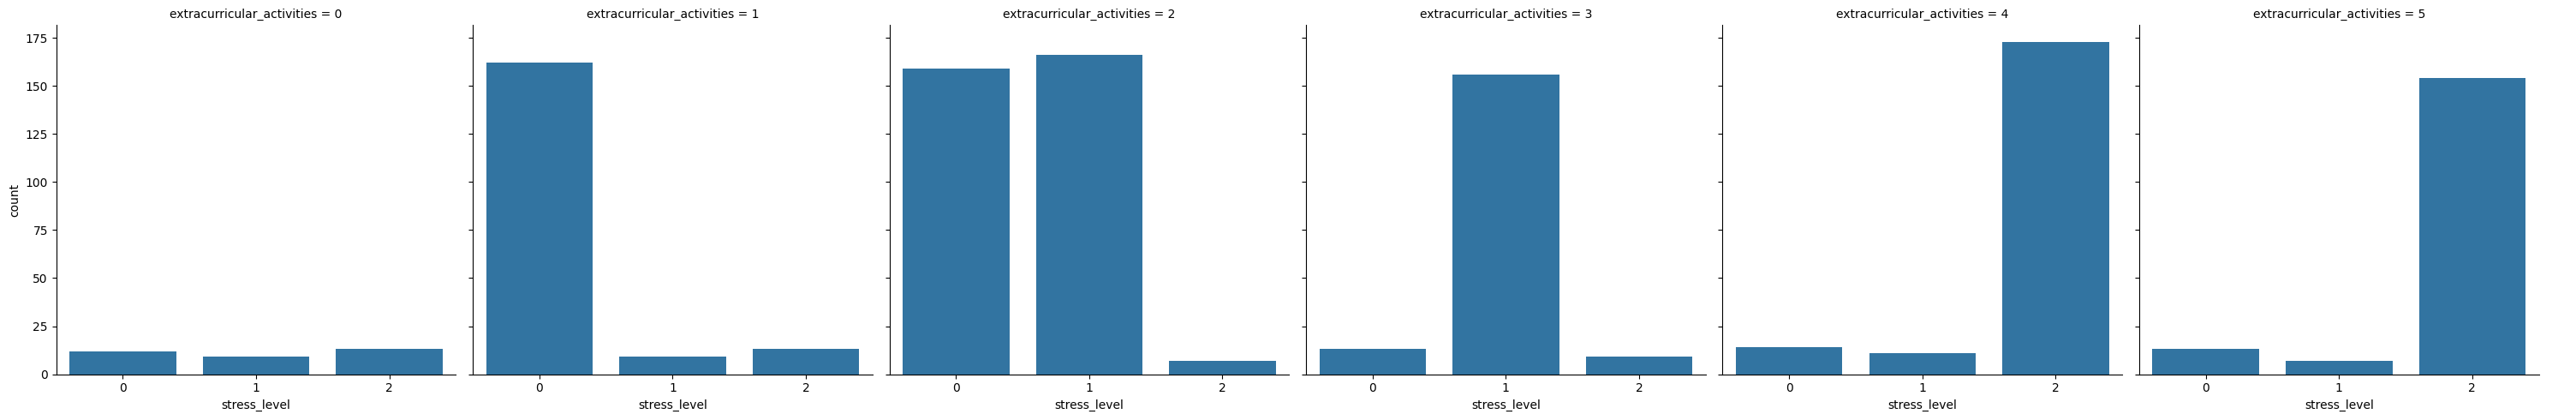

In [111]:
#feature "stress_level" split over the featuer extracurricular_activities
sns.catplot(x='stress_level',col='extracurricular_activities',kind='count',data=df);

<Axes: xlabel='bullying', ylabel='count'>

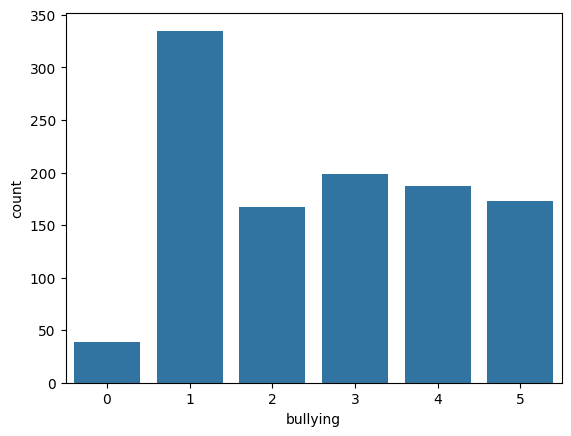

In [112]:
#feature bullying
sns.countplot(x='bullying',data=df)

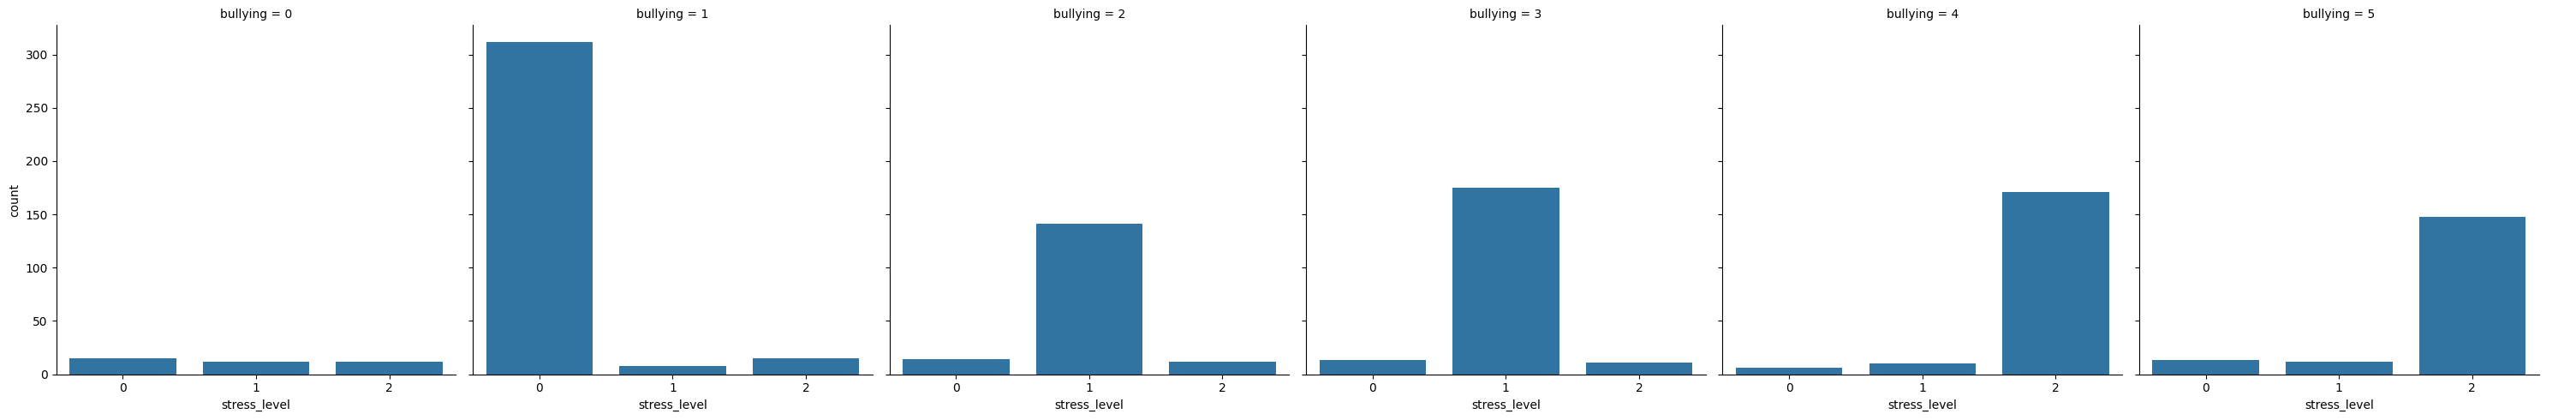

In [113]:
#fetaure stress_level split over the feature bullying last year
sns.catplot(x='stress_level',col='bullying',kind='count',data=df)

<Axes: xlabel='self_esteem', ylabel='count'>

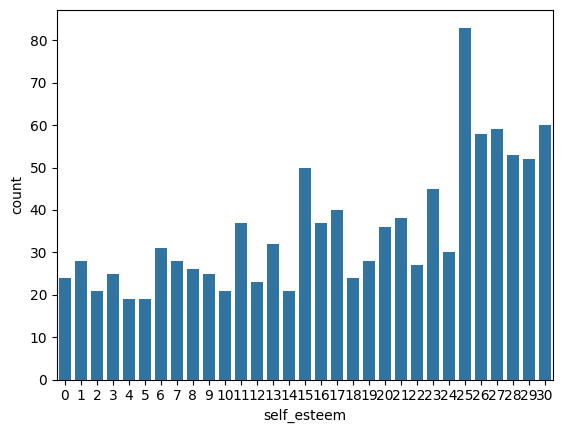

In [114]:
#feature self_esteem
sns.countplot(x='self_esteem',data=df)

<Axes: xlabel='mental_health_history', ylabel='count'>

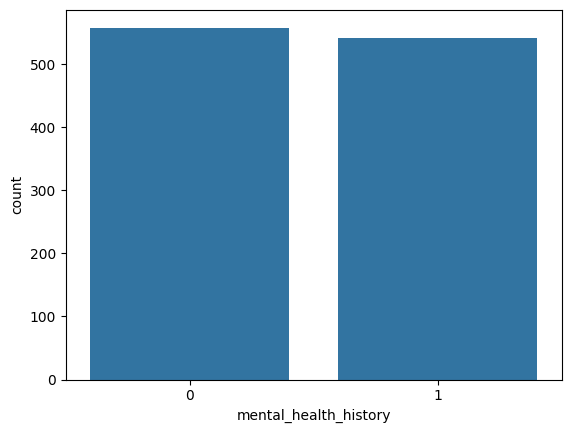

In [115]:
#feature mental_health_history
sns.countplot(x='mental_health_history',data=df)

<Axes: xlabel='depression', ylabel='count'>

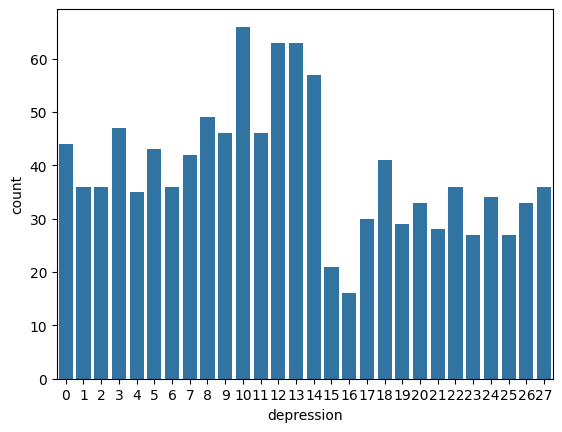

In [116]:
#feature depression
sns.countplot(x='depression',data=df)


<Axes: xlabel='headache', ylabel='count'>

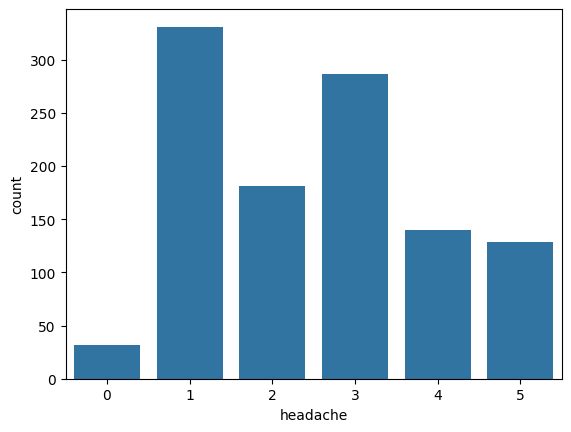

In [117]:
#feature headache
sns.countplot(x='headache',data=df)


<Axes: xlabel='blood_pressure', ylabel='count'>

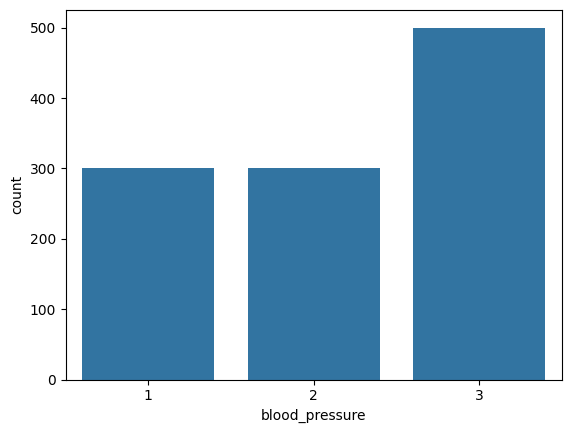

In [118]:
#feature blood_pressure
sns.countplot(x='blood_pressure',data=df)


<Axes: xlabel='sleep_quality', ylabel='count'>

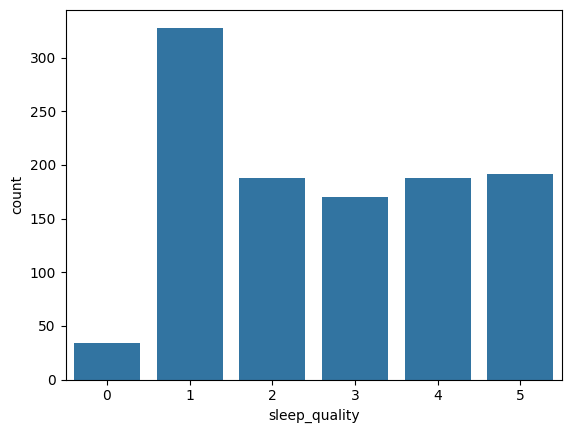

In [119]:
#feature sleep_quality
sns.countplot(x='sleep_quality',data=df)


<Axes: xlabel='breathing_problem', ylabel='count'>

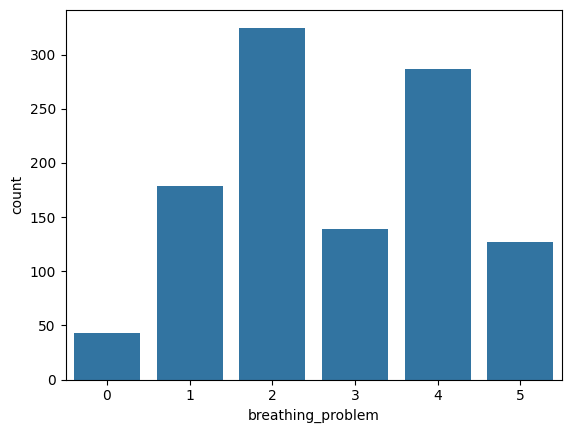

In [120]:
#feature breathing_problem
sns.countplot(x='breathing_problem',data=df)


<Axes: xlabel='noise_level', ylabel='count'>

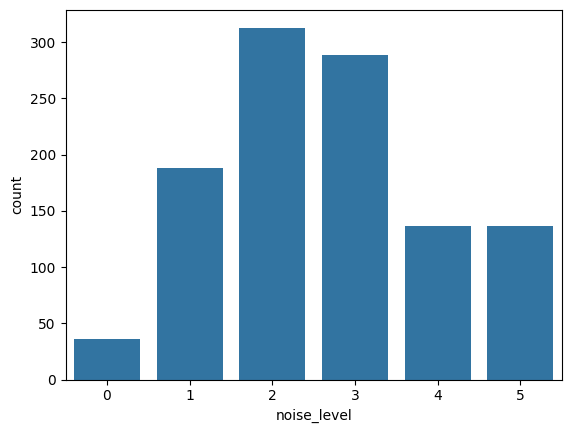

In [121]:
#feature noise_level
sns.countplot(x='noise_level',data=df)


<Axes: xlabel='living_conditions', ylabel='count'>

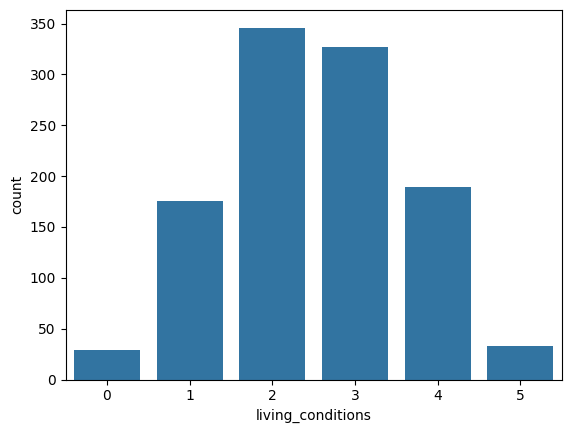

In [122]:
#feature living_conditions
sns.countplot(x='living_conditions',data=df)


<Axes: xlabel='safety', ylabel='count'>

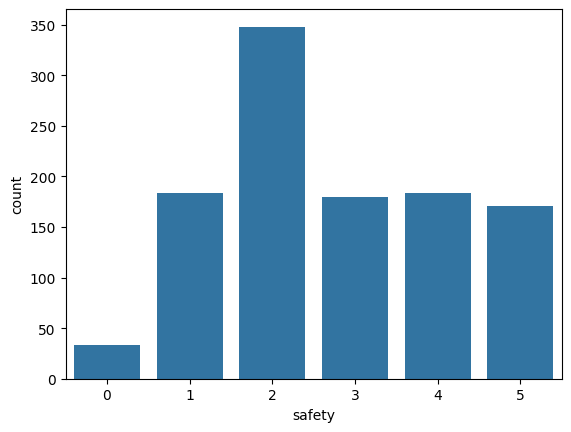

In [123]:
#feature safety
sns.countplot(x='safety',data=df)


<Axes: xlabel='basic_needs', ylabel='count'>

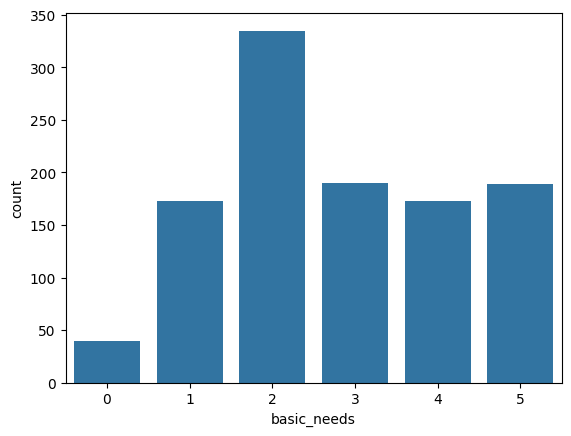

In [124]:
#feature basic_needs
sns.countplot(x='basic_needs',data=df)


<Axes: xlabel='academic_performance', ylabel='count'>

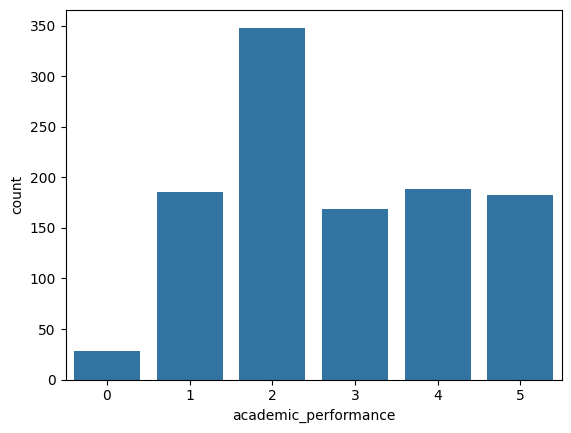

In [125]:
#feature academic_performance
sns.countplot(x='academic_performance',data=df)


<Axes: xlabel='study_load', ylabel='count'>

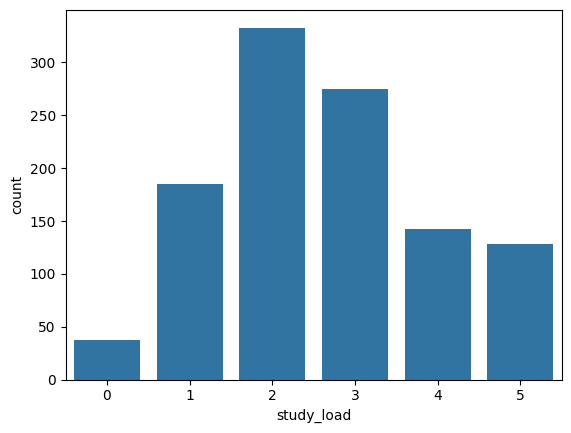

In [126]:
#feature study_load
sns.countplot(x='study_load',data=df)


<Axes: xlabel='teacher_student_relationship', ylabel='count'>

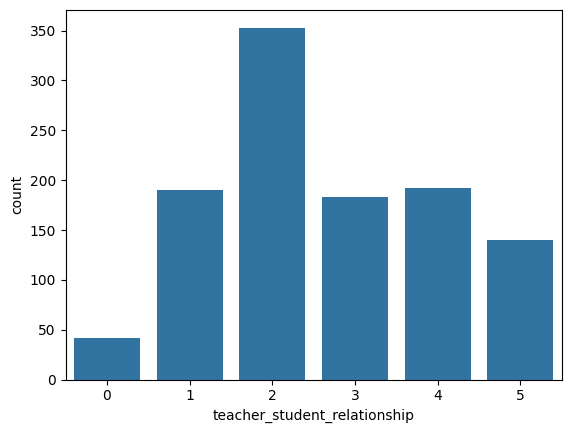

In [127]:
#feature teacher_student_relationship
sns.countplot(x='teacher_student_relationship',data=df)


<Axes: xlabel='future_career_concerns', ylabel='count'>

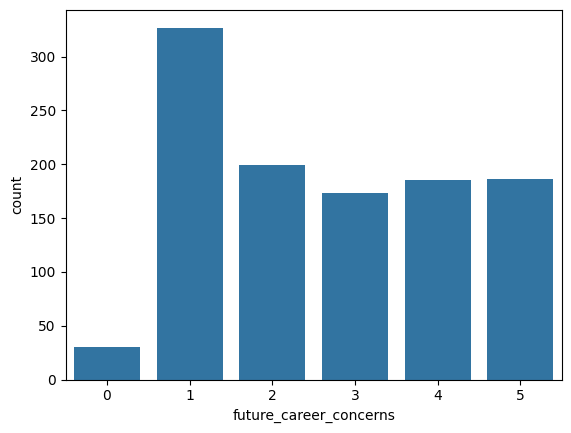

In [128]:
#feature future_career_concerns
sns.countplot(x='future_career_concerns',data=df)


<Axes: xlabel='social_support', ylabel='count'>

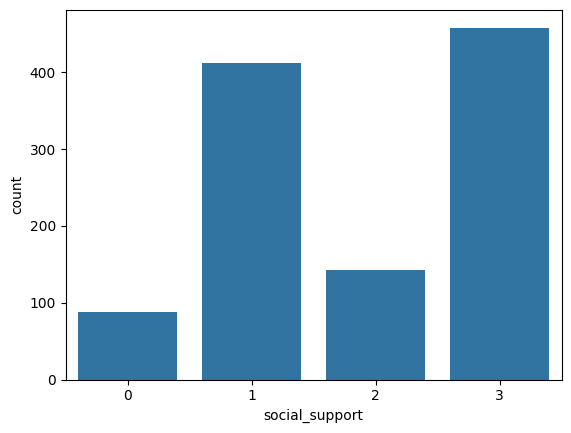

In [129]:
#feature social_support
sns.countplot(x='social_support',data=df)

<Axes: xlabel='peer_pressure', ylabel='count'>

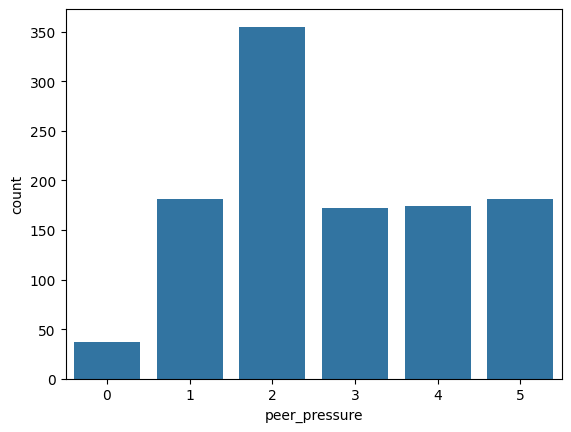

In [130]:
#feature peer_pressure
sns.countplot(x='peer_pressure',data=df)


<Axes: xlabel='extracurricular_activities', ylabel='count'>

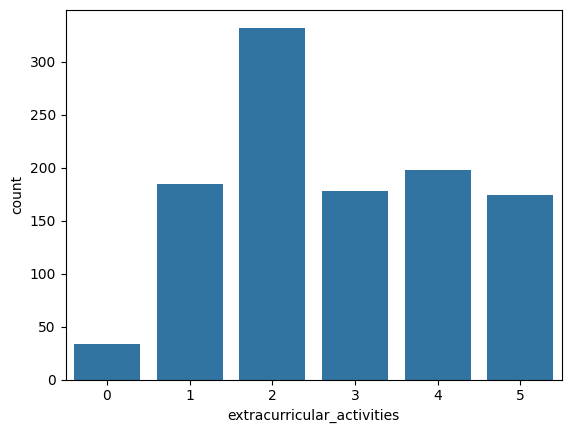

In [131]:
#feature extracurricular_activities
sns.countplot(x='extracurricular_activities',data=df)


<Axes: xlabel='bullying', ylabel='count'>

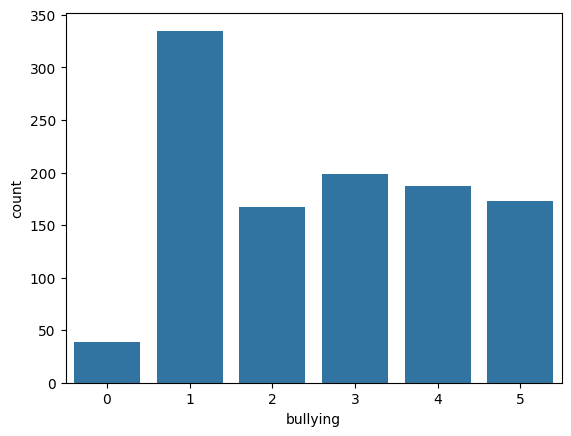

In [132]:
#feature bullying
sns.countplot(x='bullying',data=df)


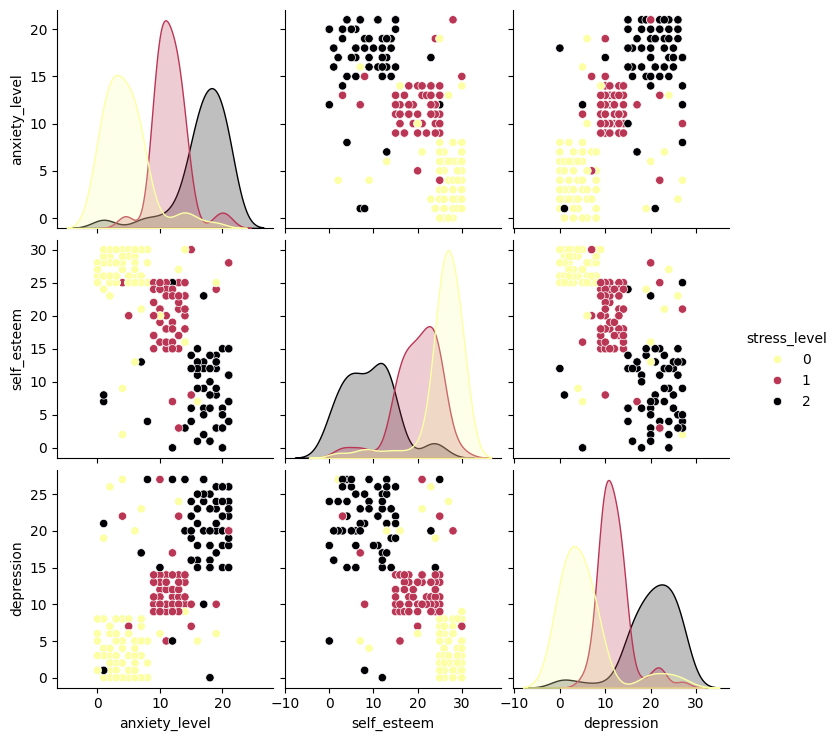

In [133]:

sampled_data = df.sample(200, random_state=42)

sns.pairplot(
    sampled_data,
    hue='stress_level',
    vars=['anxiety_level', 'self_esteem', 'depression'],
    palette='inferno_r'
)
plt.show()


<ipython-input-134-1895767f230f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['stress_level'])


<Axes: xlabel='stress_level', ylabel='Density'>

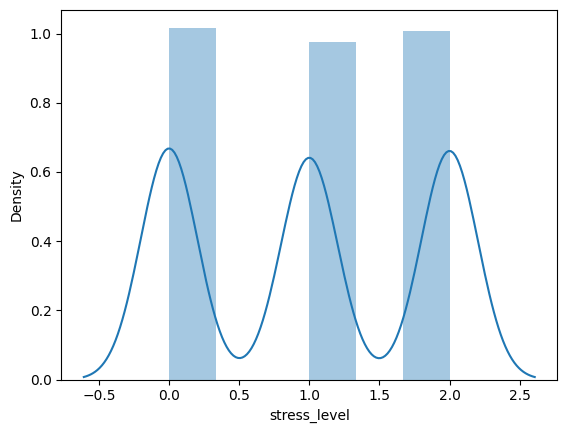

In [134]:
#stress_level
sns.distplot(df['stress_level'])

<Axes: xlabel='stress_level', ylabel='study_load'>

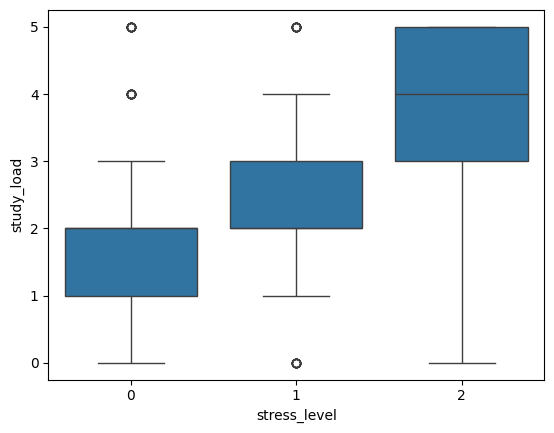

In [135]:
#box plot show distribution w.r.t catgories
sns.boxplot(x='stress_level',y="study_load",data=df)

<Axes: ylabel='bullying'>

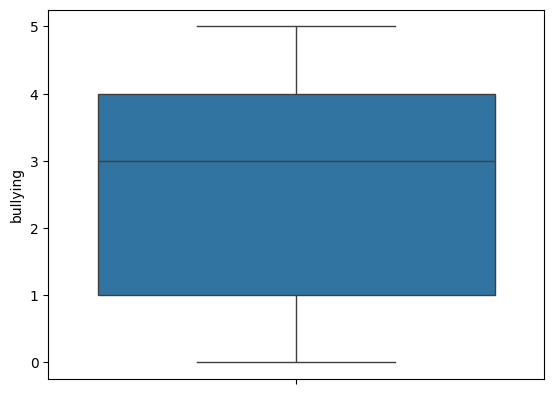

In [136]:
sns.boxplot(df['bullying'])

<ipython-input-137-324f721ee84e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['peer_pressure'])


<Axes: xlabel='peer_pressure', ylabel='Density'>

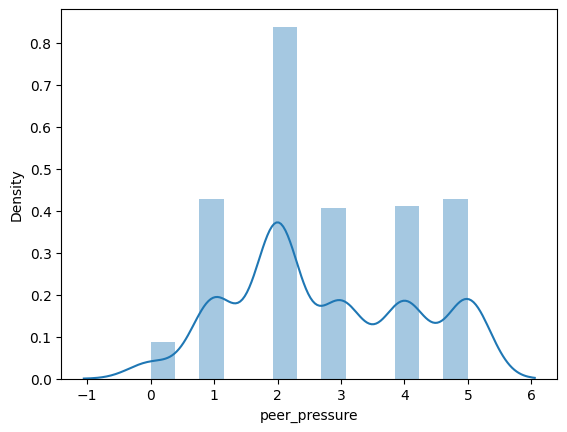

In [137]:
sns.distplot(df['peer_pressure'])

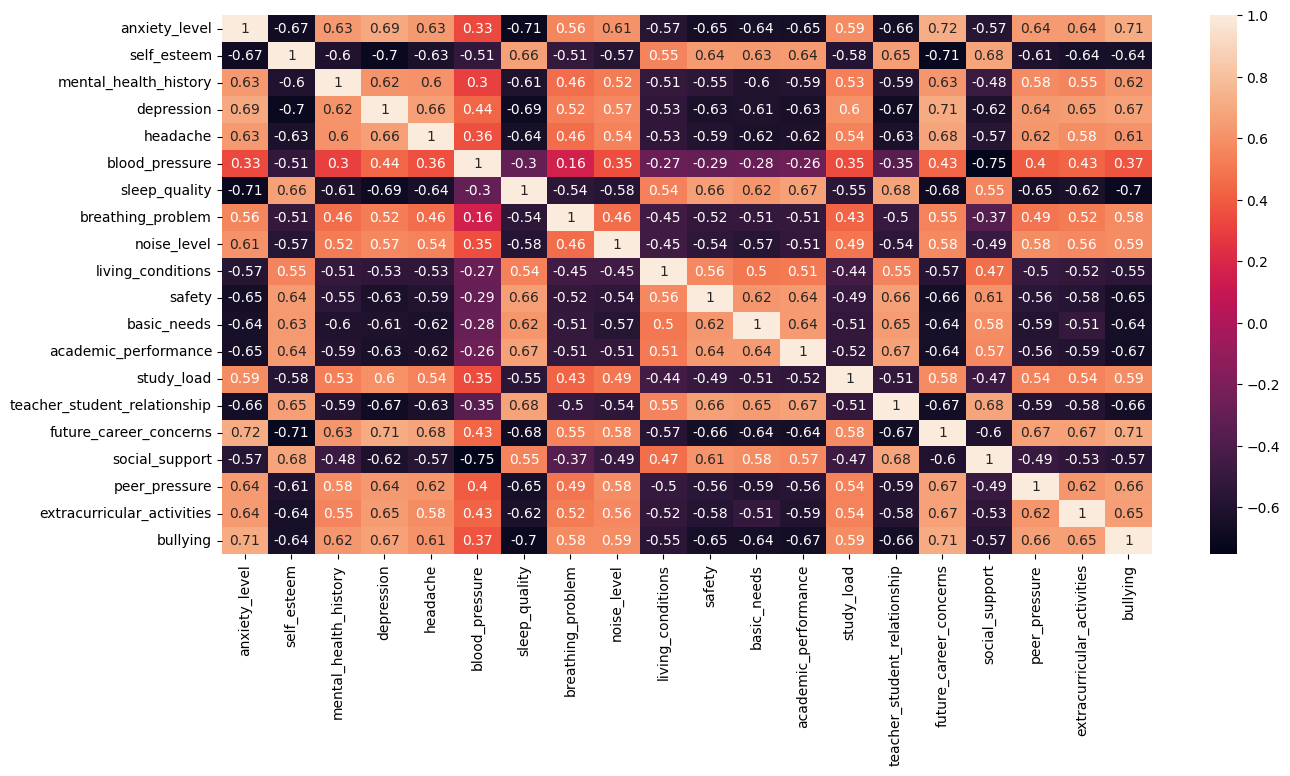

In [138]:
#checking for correlation
df_numeric = df.drop(columns=['stress_level'])  # Replace 'column_name' with the actual name of the non-numeric column

# Calculate the correlation matrix
cor_mat = df_numeric.corr()

# Plot the heatmap
fig = plt.figure(figsize=(15, 7))
sns.heatmap(cor_mat, annot=True)
plt.show()

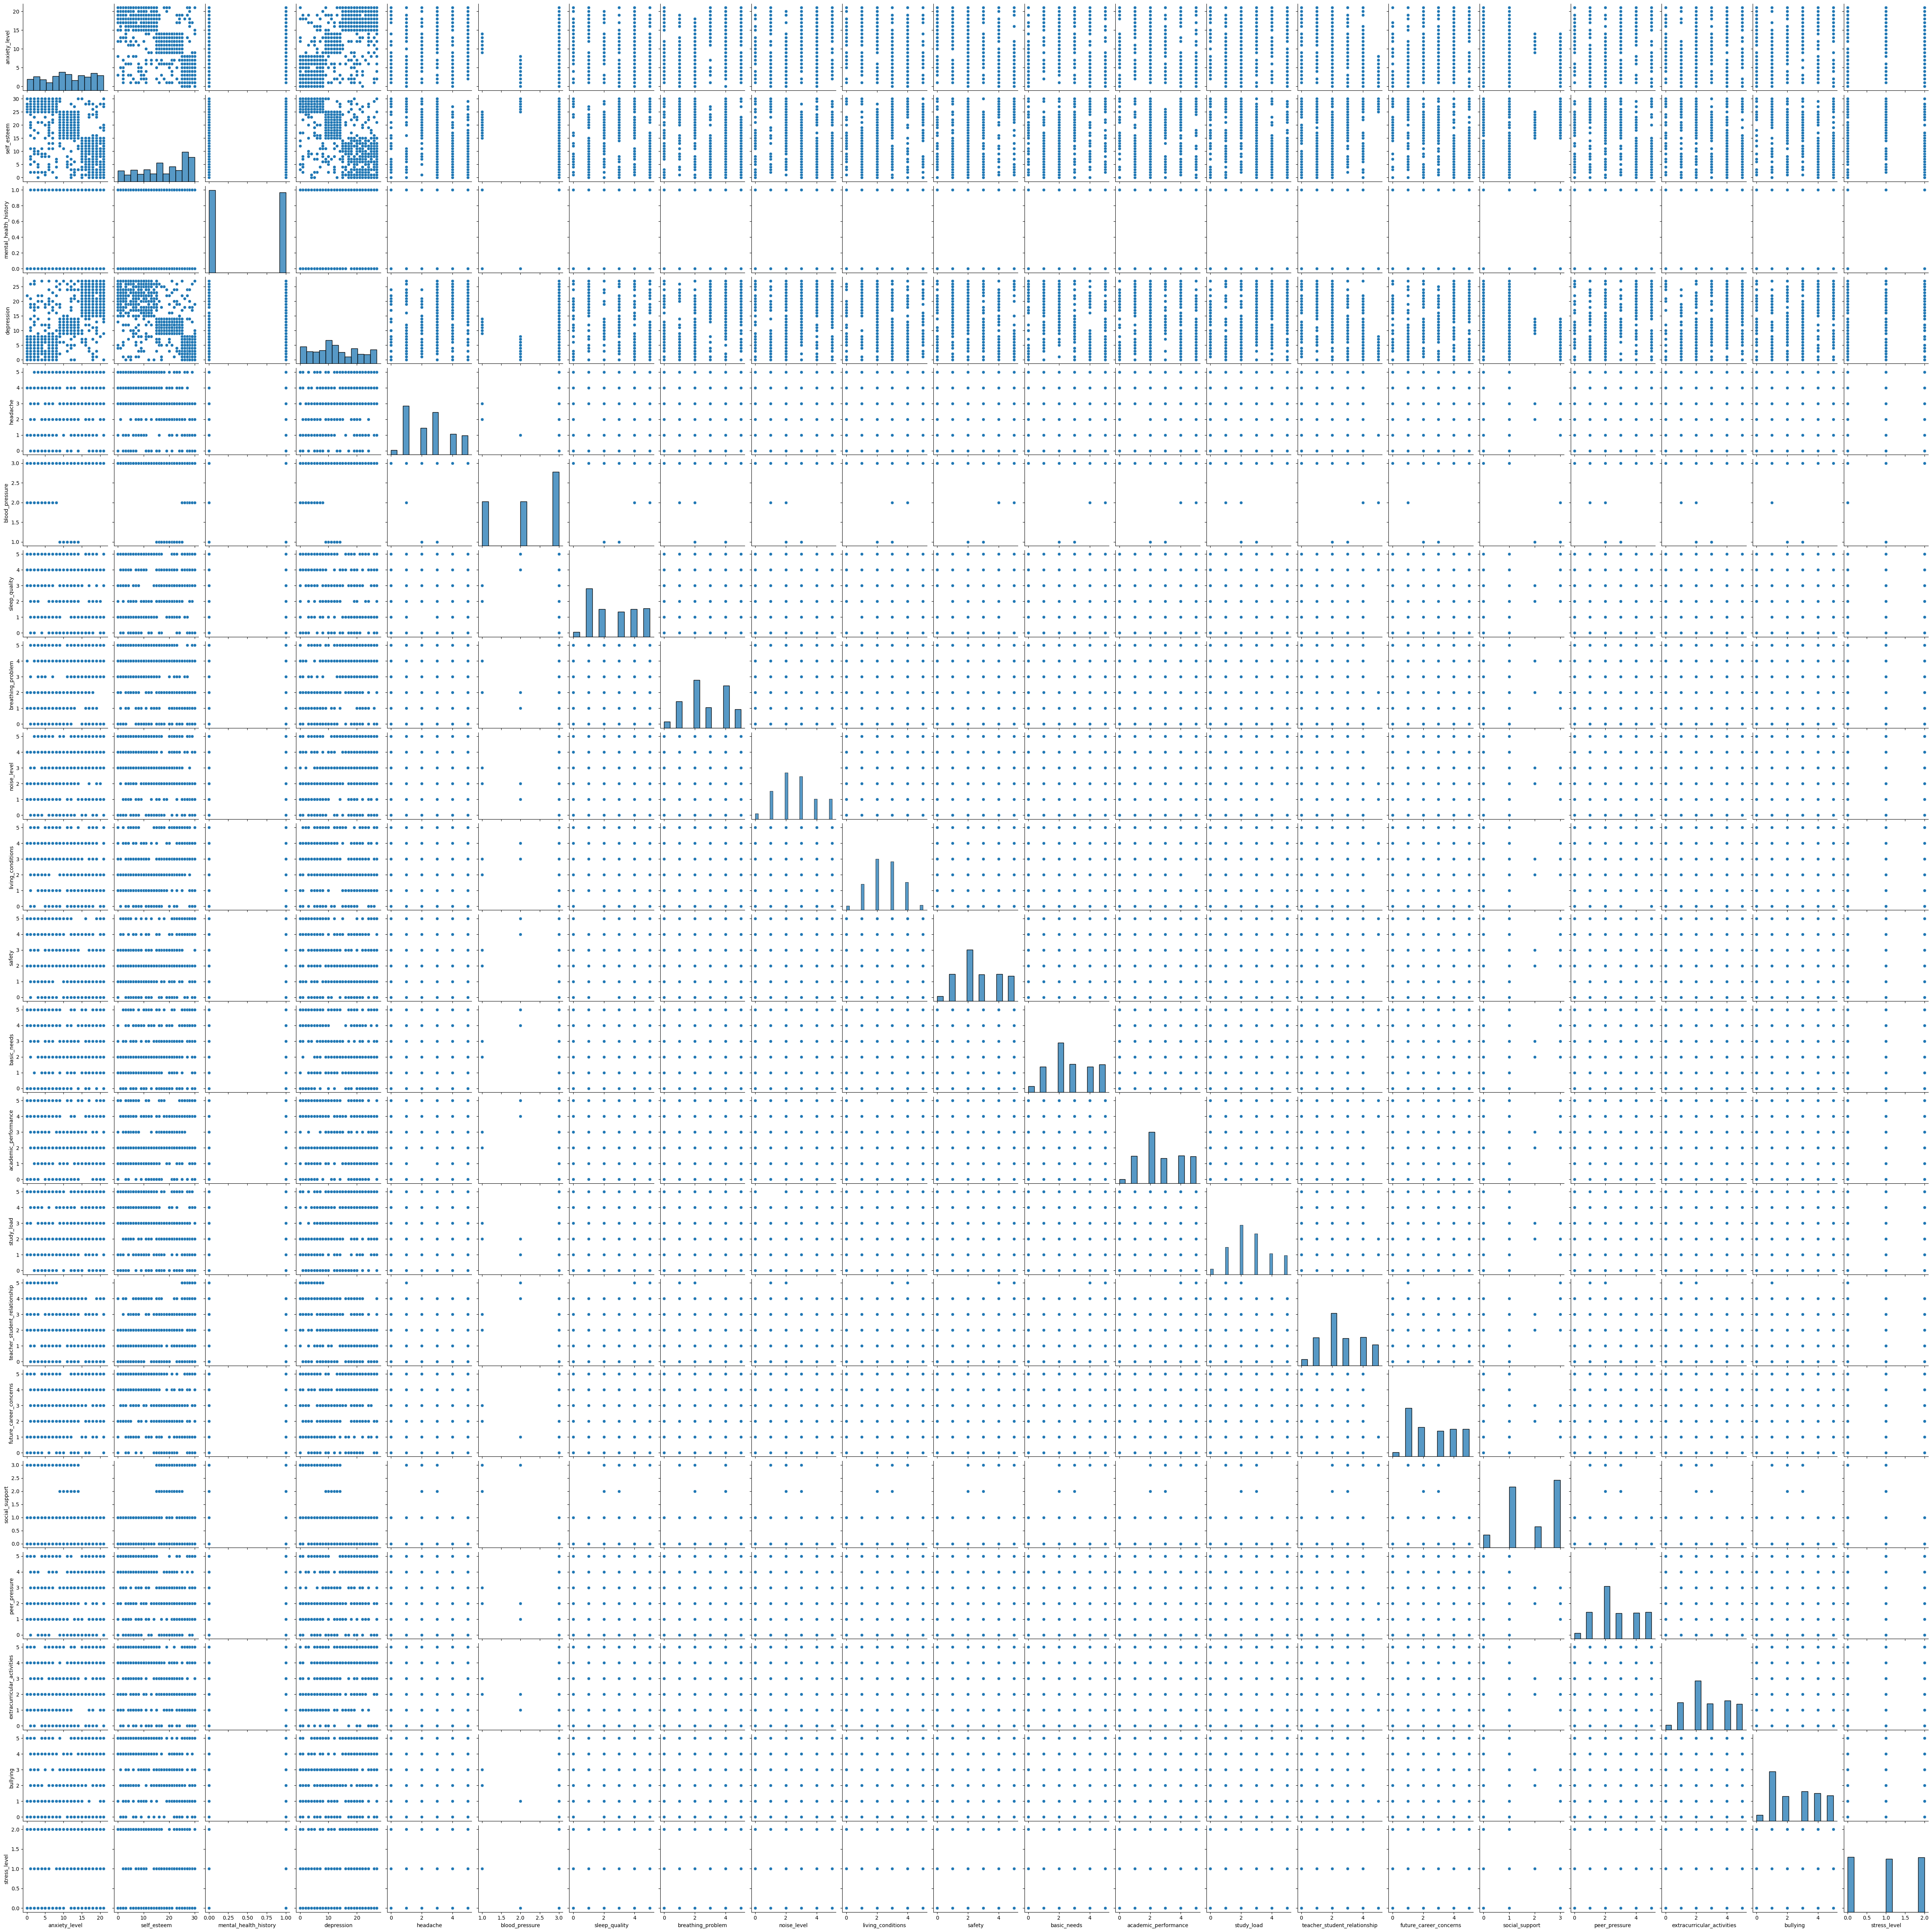

In [139]:
sns.pairplot(df)

<Axes: ylabel='count'>

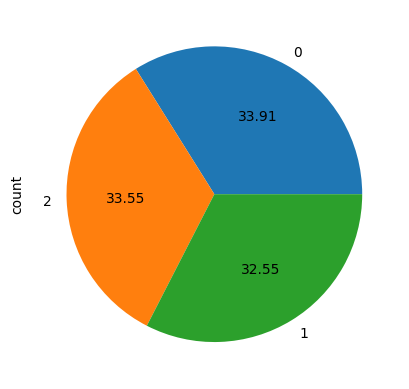

In [140]:
df['stress_level'].value_counts().plot(kind='pie',autopct='%.2f')

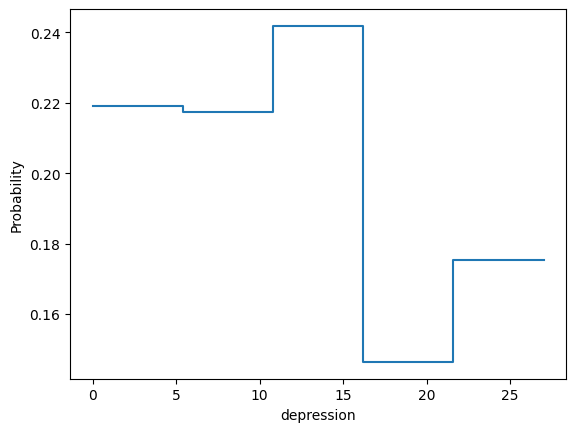

In [141]:
sns.histplot(x = 'depression',data=df, binwidth=5, stat='probability',fill=False, element = 'step');
 #Histogram for numerical value

<Axes: xlabel='study_load', ylabel='anxiety_level'>

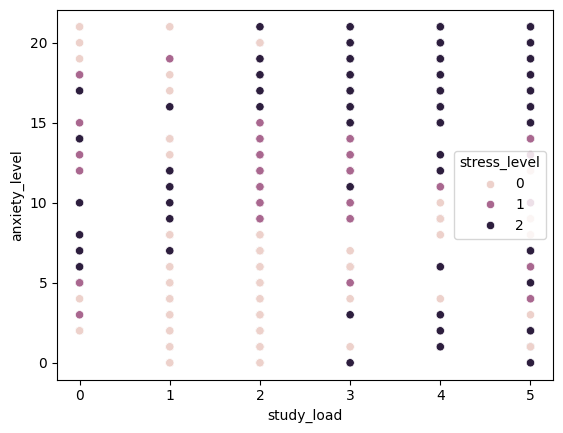

In [142]:
sns.scatterplot(x=df['study_load'], y=df['anxiety_level'], hue=df['stress_level'])

Logistic regression



In [143]:
# Define features and target
X = df.drop('anxiety_level', axis=1)
y = df['anxiety_level']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression()

In [144]:
#Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.06363636363636363


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [145]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

Confusion Matrix:
[[0 0 0 0 0 0 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 2 2 1 0 0 0 0 0 0 0 1 0 1 0 0 0]
 [2 1 1 3 0 0 0 2 1 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [1 1 0 1 0 0 2 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 2 0 1]
 [0 0 0 0 0 0 1 7 2 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 2 0 2 0 0 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1]
 [0 1 0 0 0 0 0 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 2 0 0 2 3 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 0 5 1 0 0 2 6 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 0 0 0 2 3 1 1 5 0 0 0 0 0 1 0 0]
 [0 0 0 1 0 0 0 0 0 4 3 0 0 3 1 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 6 3 0 0 2 1 0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0 0 0 2 3 1 0 1 0 0 0 1 2 0 0 1]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 3 1 0 1]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0 1 0 3 0 2]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 2 0 4]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 3 1 1 0 1 0 4]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 2 0 1 0 2 1 3]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 1 2 

In [146]:
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.08      0.12      0.10         8
           2       0.33      0.09      0.14        11
           3       0.11      0.09      0.10        11
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00        11
           6       0.00      0.00      0.00         9
           7       0.04      0.12      0.06         8
           8       0.06      0.20      0.09         5
           9       0.05      0.12      0.07         8
          10       0.07      0.06      0.06        16
          11       0.50      0.07      0.12        15
          12       0.00      0.00      0.00        13
          13       0.13      0.15      0.14        13
          14       0.00      0.00      0.00        12
          15       0.00      0.00      0.00         7
          16       0.00      0.00      0.00         9
    

In [147]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_airline = LabelEncoder()
le_flight = LabelEncoder()
le_source_city = LabelEncoder()
le_departure_time = LabelEncoder()
le_arrival_time = LabelEncoder()
le_destination_city = LabelEncoder()
le_class = LabelEncoder()
le_stops = LabelEncoder()

In [148]:
import pandas as pd


# Encode categorical columns if needed (these are examples, adjust based on your dataset)
# Assuming 'mental_health_history', 'self_esteem', and 'anxiety_level' may be categorical
df['mental_health_history_n'] = le.fit_transform(df['mental_health_history'])
df['self_esteem_n'] = le.fit_transform(df['self_esteem'])
df['anxiety_level_n'] = le.fit_transform(df['anxiety_level'])

# Drop the original columns if they were transformed
df = df.drop(['mental_health_history', 'self_esteem', 'anxiety_level'], axis=1)



In [149]:
df

,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,safety,basic_needs,academic_performance,...,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level,mental_health_history_n,self_esteem_n,anxiety_level_n
0,11,2,1,2,4,2,3,3,2,3,...,3,3,2,3,3,2,1,0,20,14
1,15,5,3,1,4,3,1,2,2,1,...,1,5,1,4,5,5,2,1,8,15
2,14,2,1,2,2,2,2,3,2,2,...,3,2,2,3,2,2,1,1,18,12
3,15,4,3,1,3,4,2,2,2,2,...,1,4,1,4,4,5,2,1,12,16
4,7,2,3,5,1,3,2,4,3,4,...,1,2,1,5,0,5,1,0,28,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,14,3,1,3,2,2,2,2,3,2,...,2,3,3,2,3,3,1,0,17,11
1096,8,0,3,0,0,0,1,3,4,0,...,1,1,1,3,4,3,2,0,12,9
1097,3,1,2,5,2,2,3,4,4,5,...,4,1,3,1,2,1,0,0,26,4
1098,19,5,3,1,4,3,1,1,1,2,...,1,4,1,4,4,4,2,1,0,21


<Axes: xlabel='headache', ylabel='study_load'>

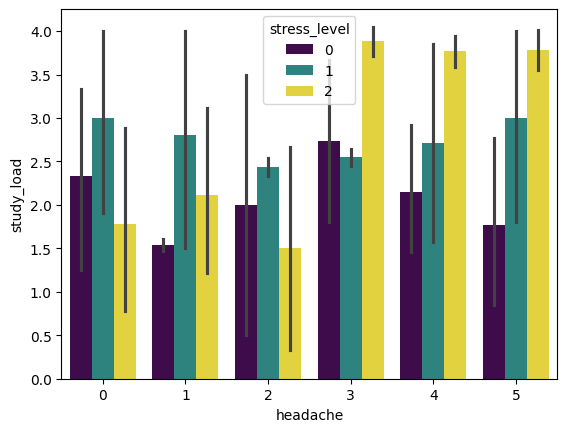

In [150]:
sns.barplot(data=df, x='headache', y='study_load', hue='stress_level', palette='viridis')

In [151]:
inputs = df.drop('stress_level',axis='columns')
target = df.stress_level

In [152]:
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.2)
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Applying GridSearch CV

In [153]:
from sklearn.model_selection import GridSearchCV

In [154]:
parameters = {
    'n_estimators': [50,100,500],
    'max_samples': [0.1,0.4,0.7,1.0],
    'bootstrap' : [True,False],
    'max_features' : [0.1,0.4,0.7,1.0]
    }

In [155]:
search = GridSearchCV(BaggingClassifier(), parameters, cv=5)

In [156]:
param_dist = {
    'n_estimators': [50, 100],  # Reduced number of estimators
    'max_samples': np.linspace(0.1, 1.0, 5),
    'estimator__max_depth': [5, 10]  # Depth limits
}

search = RandomizedSearchCV(
    estimator=BaggingClassifier(estimator=DecisionTreeClassifier(), bootstrap=True, oob_score=True, n_jobs=-1, random_state=42),
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    n_jobs=-1,
    random_state=42
)

# Fit the model on the full dataset or a smaller subset
search.fit(X_train, y_train)  # Or use a subset as mentioned earlier


RandomizedSearchCV(cv=3,
                   estimator=BaggingClassifier(estimator=DecisionTreeClassifier(),
                                               n_jobs=-1, oob_score=True,
                                               random_state=42),
                   n_jobs=-1,
                   param_distributions={'estimator__max_depth': [5, 10],
                                        'max_samples': array([0.1  , 0.325, 0.55 , 0.775, 1.   ]),
                                        'n_estimators': [50, 100]},
                   random_state=42)

In [157]:
search.best_params_
search.best_score_

0.8818385147005333

In [158]:
search.best_params_

{'n_estimators': 100, 'max_samples': 0.1, 'estimator__max_depth': 5}

# **SVM Model**

In [159]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize and train the SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
svm_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_svm),
    'Precision ': precision_score(y_test, y_pred_svm, average='macro'),
    'Recall ': recall_score(y_test, y_pred_svm, average='macro'),
    'F1-Score ': f1_score(y_test, y_pred_svm, average='macro')
}

# Print the evaluation metrics
print("SVM Metrics:")
for metric, score in svm_metrics.items():
    print(f"{metric}: {score:.4f}")


SVM Metrics:
Accuracy: 0.8818
Precision : 0.8820
Recall : 0.8824
F1-Score : 0.8816


# Decision Tree Model

In [160]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier

# Initialize and train Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_model.predict(X_test)
dt_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_dt),
    'Precision (Macro)': precision_score(y_test, y_pred_dt, average='macro'),
    'Recall (Macro)': recall_score(y_test, y_pred_dt, average='macro'),
    'F1-Score (Macro)': f1_score(y_test, y_pred_dt, average='macro')
}

print("Decision Tree Metrics:")
for metric, score in dt_metrics.items():
    print(f"{metric}: {score:.4f}")


Decision Tree Metrics:
Accuracy: 0.8818
Precision (Macro): 0.8833
Recall (Macro): 0.8816
F1-Score (Macro): 0.8823


# KNN Model

In [161]:
# Initialize and train KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_knn = knn_model.predict(X_test)
knn_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_knn),
    'Precision (Macro)': precision_score(y_test, y_pred_knn, average='macro'),
    'Recall (Macro)': recall_score(y_test, y_pred_knn, average='macro'),
    'F1-Score (Macro)': f1_score(y_test, y_pred_knn, average='macro')
}

# Print the metrics
print("KNN Metrics:")
for metric, score in knn_metrics.items():
    print(f"{metric}: {score:.4f}")

KNN Metrics:
Accuracy: 0.8727
Precision (Macro): 0.8738
Recall (Macro): 0.8720
F1-Score (Macro): 0.8721


# Naive Bayes model

In [162]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the Naive Bayes model
nb_model = GaussianNB()

# Train the model on the training data
nb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model using various metrics
nb_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_nb),  # Overall accuracy
    'Precision (Macro)': precision_score(y_test, y_pred_nb, average='macro'),  # Precision averaged equally across classes
    'Recall (Macro)': recall_score(y_test, y_pred_nb, average='macro'),  # Recall averaged equally across classes
    'F1-Score (Macro)': f1_score(y_test, y_pred_nb, average='macro')  # F1-Score averaged equally across classes
}

# Print the metrics
print("Naive Bayes Metrics:")
for metric, score in nb_metrics.items():
    print(f"{metric}: {score:.4f}")


Naive Bayes Metrics:
Accuracy: 0.8773
Precision (Macro): 0.8899
Recall (Macro): 0.8822
F1-Score (Macro): 0.8778


In [163]:

# storing classifier and classifier accuracy
plot_test_acc=[]
classifier = []

#  **Decision Tree Classifier**

In [164]:
DT = DecisionTreeClassifier(random_state = 0)
DT.fit(X_train, y_train)
print('Accuracy of GB classifier on training set: ',(DT.score(X_train, y_train)))
print('Accuracy of GB classifier on test set:', (DT.score(X_test, y_test)))

plot_test_acc.append(DT.score(X_test, y_test))
classifier.append('Decision Tree')

Accuracy of GB classifier on training set:  1.0
Accuracy of GB classifier on test set: 0.8909090909090909


              precision    recall  f1-score   support

           0       0.91      0.88      0.89        77
           1       0.91      0.88      0.90        78
           2       0.86      0.91      0.88        65

    accuracy                           0.89       220
   macro avg       0.89      0.89      0.89       220
weighted avg       0.89      0.89      0.89       220



<Axes: >

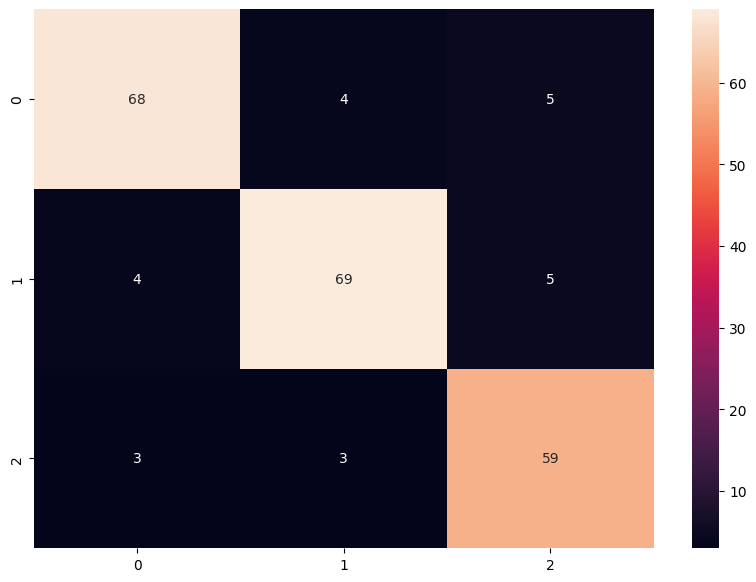

In [165]:
predicted = DT.predict(X_test)
print(classification_report(y_test,predicted))
plt.subplots(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test,predicted), annot = True)

# Random Forest - Bagging Model

In [166]:
RF = RandomForestClassifier(random_state = 0)
RF.fit(X_train, y_train)
print('Accuracy of RF classifier on training set: ',(RF.score(X_train, y_train)))
print('Accuracy of RF classifier on test set:', (RF.score(X_test, y_test)))

plot_test_acc.append(RF.score(X_test, y_test))
classifier.append('Random Forest')

Accuracy of RF classifier on training set:  1.0
Accuracy of RF classifier on test set: 0.8727272727272727


              precision    recall  f1-score   support

           0       0.80      0.90      0.85        77
           1       0.94      0.83      0.88        78
           2       0.89      0.89      0.89        65

    accuracy                           0.87       220
   macro avg       0.88      0.87      0.87       220
weighted avg       0.88      0.87      0.87       220



<Axes: >

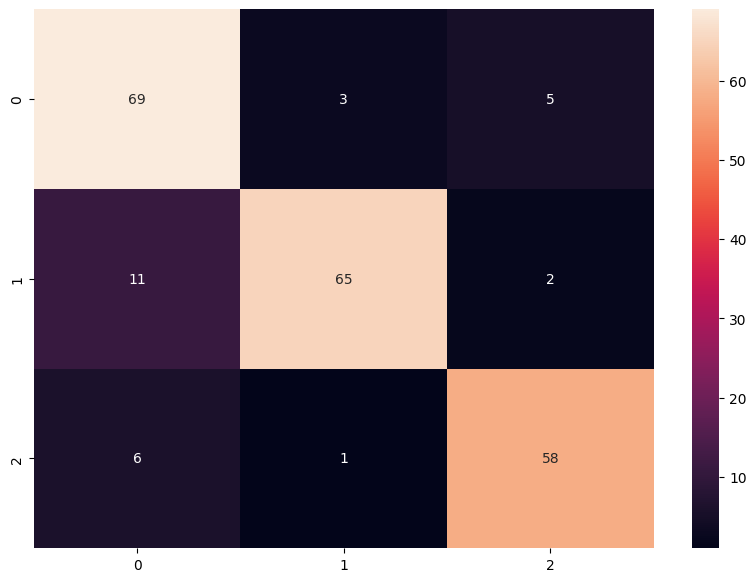

In [167]:
predicted = RF.predict(X_test)
print(classification_report(y_test,predicted))
plt.subplots(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test,predicted), annot = True)

# **Gradient Boosting Classifier - Boosting Model**

In [168]:
GB = GradientBoostingClassifier(random_state = 0)
GB.fit(X_train, y_train)
print('Accuracy of GB classifier on training set: ',(GB.score(X_train, y_train)))
print('Accuracy of GB classifier on test set:', (GB.score(X_test, y_test)))

plot_test_acc.append(GB.score(X_test, y_test))
classifier.append('Gradient Boosting')

Accuracy of GB classifier on training set:  1.0
Accuracy of GB classifier on test set: 0.8818181818181818


              precision    recall  f1-score   support

           0       0.86      0.87      0.86        77
           1       0.94      0.87      0.91        78
           2       0.84      0.91      0.87        65

    accuracy                           0.88       220
   macro avg       0.88      0.88      0.88       220
weighted avg       0.88      0.88      0.88       220



<Axes: >

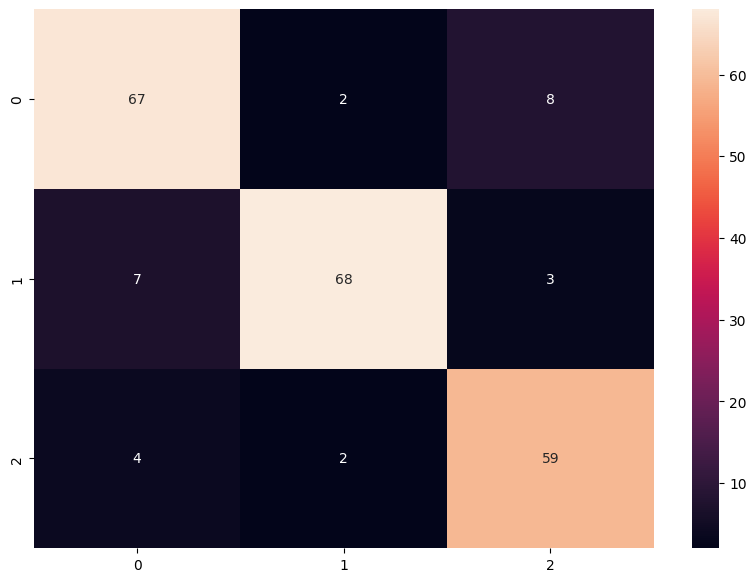

In [169]:
predicted = GB.predict(X_test)
print(classification_report(y_test,predicted))
plt.subplots(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test,predicted), annot = True)

# **XG Boost Classifier - Boosting Model**

In [170]:
import xgboost as xgb
XG = xgb.XGBClassifier()
XG.fit(X_train, y_train)

train_pred = XG.predict(X_train)
test_pred = XG.predict(X_test)

train_score = metrics.accuracy_score(y_train, train_pred)
test_score = metrics.accuracy_score(y_test, test_pred)
print('Accuracy of XGBOOST classifier on training set: ',train_score)
print('Accuracy of XGBOOST classifier on test set:', test_score)

plot_test_acc.append(test_score)
classifier.append('XG Boost')

Accuracy of XGBOOST classifier on training set:  1.0
Accuracy of XGBOOST classifier on test set: 0.8818181818181818


# AdaBoost classifier

In [171]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

# Initialize and fit AdaBoost classifier
ADA = AdaBoostClassifier()
ADA.fit(X_train, y_train)

# Predictions
train_pred_ada = ADA.predict(X_train)
test_pred_ada = ADA.predict(X_test)

# Accuracy scores
train_score_ada = metrics.accuracy_score(y_train, train_pred_ada)
test_score_ada = metrics.accuracy_score(y_test, test_pred_ada)

# Print results
print('Accuracy of AdaBoost classifier on training set: ', train_score_ada)
print('Accuracy of AdaBoost classifier on test set:', test_score_ada)

# Append to lists
plot_test_acc.append(test_score_ada)
classifier.append('Ada Boost')


Accuracy of AdaBoost classifier on training set:  0.9375
Accuracy of AdaBoost classifier on test set: 0.8727272727272727


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [172]:
for i,score in zip(classifier,plot_test_acc):
  print(i, ": ", score)

Decision Tree :  0.8909090909090909
Random Forest :  0.8727272727272727
Gradient Boosting :  0.8818181818181818
XG Boost :  0.8818181818181818
Ada Boost :  0.8727272727272727


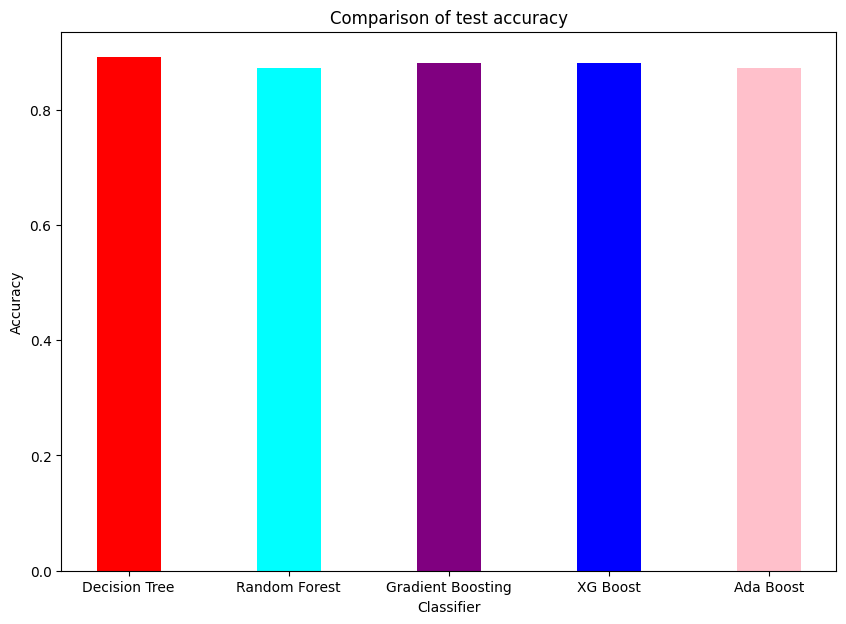

In [173]:
fig = plt.figure(figsize = (10, 7))
plt.bar(classifier, plot_test_acc,color=['red', 'cyan', 'purple', 'blue','pink'],width = 0.4)
plt.xlabel("Classifier")
plt.ylabel("Accuracy")
plt.title("Comparison of test accuracy")
plt.show()

The model accuracy results for different classifiers are as follows:

Decision Tree: 0.8864
Random Forest: 0.8818
Gradient Boosting: 0.8909
XGBoost: 0.8955
AdaBoost: 0.8818
XGBoost is the top performer:
With the highest accuracy of 0.8955, XGBoost demonstrates its effectiveness in handling complex datasets and leveraging boosting techniques to optimize performance.

Gradient Boosting closely follows:
Gradient Boosting achieves 0.8909, slightly behind XGBoost, showing that it also handles boosting well but might lack the advanced optimizations present in XGBoost.

Decision Tree performs reasonably well:
The Decision Tree classifier achieves 0.8864, which is competitive but slightly behind the boosting-based models. Its simplicity may limit its ability to generalize as effectively.

Random Forest and AdaBoost show similar performance:
Both Random Forest and AdaBoost achieve 0.8818. While Random Forest benefits from ensemble averaging, AdaBoost may not be fully optimized for the dataset used.